<a href="https://colab.research.google.com/github/Newball12/tuplas2/blob/main/%20TAREA%20taller%20final%20Estructura%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 1: Construcción de un Árbol**
**Objetivo:** Practicar la construcción y representación de árboles binarios de búsqueda.


Inorder:
3 6 9 15 17 18 20 
Preorder:
15 6 3 9 18 17 20 
Postorder:
3 9 6 17 20 18 15 

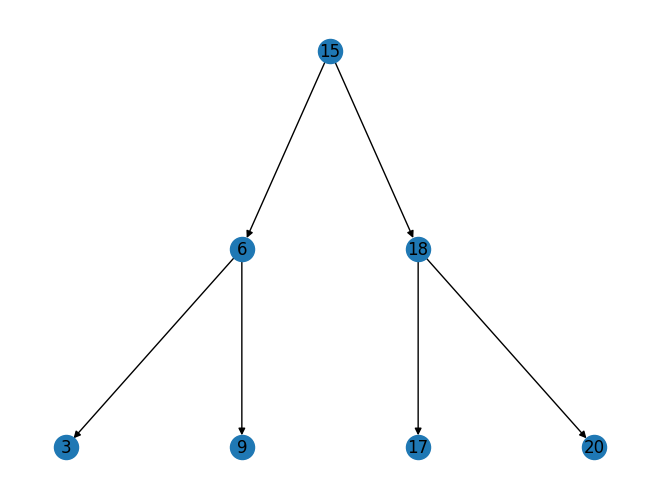

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

class Node:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data

def insert(root, node):
    if root is None:
        root = node
    else:
        if root.data < node.data:
            if root.right is None:
                root.right = node
            else:
                insert(root.right, node)
        else:
            if root.left is None:
                root.left = node
            else:
                insert(root.left, node)

def inorder(root):
    if root:
        inorder(root.left)
        print(root.data, end=" ")
        inorder(root.right)

def preorder(root):
    if root:
        print(root.data, end=" ")
        preorder(root.left)
        preorder(root.right)

def postorder(root):
    if root:
        postorder(root.left)
        postorder(root.right)
        print(root.data, end=" ")

def draw_tree(root):
    G = nx.DiGraph()
    nodes = []
    edges = []

    def add_node(node, parent=None):
        nodes.append(node.data)
        if parent:
            edges.append((parent.data, node.data))
        if node.left:
            add_node(node.left, node)
        if node.right:
            add_node(node.right, node)

    add_node(root)
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
    nx.draw(G, pos, with_labels=True, arrows=True)
    plt.show()

# Valores del ejercicio
values = [15, 6, 3, 9, 18, 20, 17]

# Crear el árbol
root = Node(values[0])
for value in values[1:]:
    insert(root, Node(value))

# Recorridos
print("Inorder:")
inorder(root)
print("\nPreorder:")
preorder(root)
print("\nPostorder:")
postorder(root)

# Dibujar el árbol
draw_tree(root)

# **Ejercicio 2: Validación de un Recorrido**
**Objetivo:** Desarrollar una comprensión profunda de los recorridos y su relación con la estructura del árbol.

# Explicación para reconstruir el árbol

Para reconstruir un árbol binario:
1. El recorrido Inorden define el orden de los nodos en el árbol (izquierdo -> raíz -> derecho).
2. El recorrido Preorden (raíz -> izquierdo -> derecho) o Postorden (izquierdo -> derecho -> raíz) nos da
   información adicional para identificar cómo se construye el árbol.

Con Inorden y Preorden juntos, o Inorden y Postorden, podemos reconstruir el árbol completamente.




In [11]:
# Definición de la clase Nodo para el árbol binario
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izquierdo = None
        self.derecho = None

# Función para insertar valores en el árbol binario
def insertar_en_arbol(raiz, valor):
    if raiz is None:
        return Nodo(valor)
    if valor < raiz.valor:
        raiz.izquierdo = insertar_en_arbol(raiz.izquierdo, valor)
    else:
        raiz.derecho = insertar_en_arbol(raiz.derecho, valor)
    return raiz

# Función para realizar el recorrido Inorden
def recorrido_inorden(raiz):
    if raiz is None:
        return []
    return recorrido_inorden(raiz.izquierdo) + [raiz.valor] + recorrido_inorden(raiz.derecho)

# Función para realizar el recorrido Preorden
def recorrido_preorden(raiz):
    if raiz is None:
        return []
    return [raiz.valor] + recorrido_preorden(raiz.izquierdo) + recorrido_preorden(raiz.derecho)

# Función para realizar el recorrido Postorden
def recorrido_postorden(raiz):
    if raiz is None:
        return []
    return recorrido_postorden(raiz.izquierdo) + recorrido_postorden(raiz.derecho) + [raiz.valor]

# Construcción del árbol binario
valores = [10, 5, 15, 2, 7, 12, 18]
raiz = None
for valor in valores:
    raiz = insertar_en_arbol(raiz, valor)

# Validación del recorrido Inorden
print("Recorrido Inorden generado:", recorrido_inorden(raiz))
print("Recorrido Inorden esperado: [2, 5, 7, 10, 12, 15, 18]")

# Generación de los recorridos Preorden y Postorden
print("Recorrido Preorden:", recorrido_preorden(raiz))
print("Recorrido Postorden:", recorrido_postorden(raiz))


Recorrido Inorden generado: [2, 5, 7, 10, 12, 15, 18]
Recorrido Inorden esperado: [2, 5, 7, 10, 12, 15, 18]
Recorrido Preorden: [10, 5, 2, 7, 15, 12, 18]
Recorrido Postorden: [2, 7, 5, 12, 18, 15, 10]


# **Ejercicio 3: Identificación de Árboles**
**Objetivo:** Explorar cómo los recorridos se pueden usar para reconstruir y validar árboles binarios.

Recorrido Preorden generado: [8, 3, 1, 6, 4, 7, 10, 14, 13]
Recorrido Inorden generado: [1, 3, 4, 6, 7, 8, 10, 13, 14]
Árbol generado:


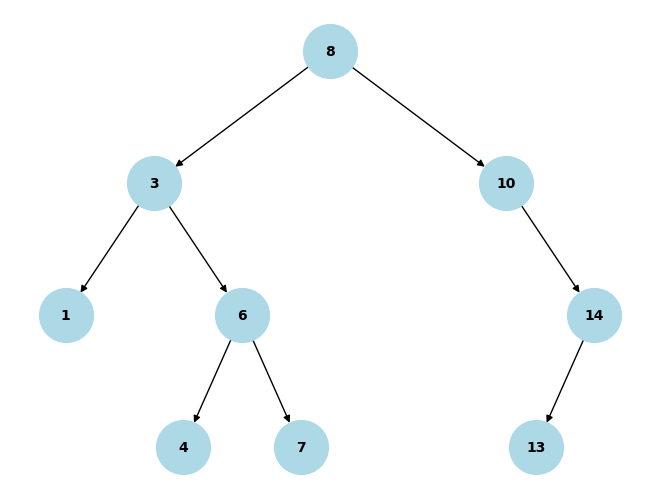

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Definición de la clase Nodo para el árbol binario
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izquierdo = None
        self.derecho = None

# Función para reconstruir el árbol a partir de Preorden e Inorden
def reconstruir_arbol(preorden, inorden):
    if not preorden or not inorden:
        return None
    # La raíz es el primer elemento del Preorden
    raiz_valor = preorden[0]
    raiz = Nodo(raiz_valor)
    # Encuentra la posición de la raíz en el Inorden
    indice_raiz = inorden.index(raiz_valor)
    # Elementos del subárbol izquierdo
    inorden_izquierdo = inorden[:indice_raiz]
    preorden_izquierdo = preorden[1:1 + len(inorden_izquierdo)]
    # Elementos del subárbol derecho
    inorden_derecho = inorden[indice_raiz + 1:]
    preorden_derecho = preorden[1 + len(inorden_izquierdo):]
    # Construcción recursiva de los subárboles
    raiz.izquierdo = reconstruir_arbol(preorden_izquierdo, inorden_izquierdo)
    raiz.derecho = reconstruir_arbol(preorden_derecho, inorden_derecho)
    return raiz

# Función para validar los recorridos generados
def recorrido_inorden(raiz):
    if raiz is None:
        return []
    return recorrido_inorden(raiz.izquierdo) + [raiz.valor] + recorrido_inorden(raiz.derecho)

def recorrido_preorden(raiz):
    if raiz is None:
        return []
    return [raiz.valor] + recorrido_preorden(raiz.izquierdo) + recorrido_preorden(raiz.derecho)

# Función para graficar el árbol
def graficar_arbol(raiz):
    def agregar_nodos_aristas(nodo, grafo, pos, x=0, y=0, nivel=1):
        if nodo:
            grafo.add_node(nodo.valor, pos=(x, y))
            if nodo.izquierdo:
                grafo.add_edge(nodo.valor, nodo.izquierdo.valor)
                agregar_nodos_aristas(nodo.izquierdo, grafo, pos, x - 1 / nivel, y - 1, nivel + 1)
            if nodo.derecho:
                grafo.add_edge(nodo.valor, nodo.derecho.valor)
                agregar_nodos_aristas(nodo.derecho, grafo, pos, x + 1 / nivel, y - 1, nivel + 1)

    grafo = nx.DiGraph()
    pos = {}
    agregar_nodos_aristas(raiz, grafo, pos)
    pos = nx.get_node_attributes(grafo, 'pos')
    nx.draw(grafo, pos, with_labels=True, node_size=1500, node_color="lightblue", font_size=10, font_weight="bold")
    plt.show()

# Datos del ejercicio
preorden = [8, 3, 1, 6, 4, 7, 10, 14, 13]
inorden = [1, 3, 4, 6, 7, 8, 10, 13, 14]

# Reconstrucción del árbol
raiz = reconstruir_arbol(preorden, inorden)

# Validación de los recorridos
print("Recorrido Preorden generado:", recorrido_preorden(raiz))
print("Recorrido Inorden generado:", recorrido_inorden(raiz))

# Graficar el árbol
print("Árbol generado:")
graficar_arbol(raiz)
